In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

# import image

(3508, 2481, 3)
26110044
float32


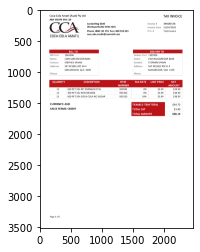

In [2]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread("Test Invoice 344649176.png")
plt.imshow(img)
print(img.shape)
print(img.size)
print(img.dtype)

# Improve Quality

In [16]:
# Import the Images module from pillow
from PIL import Image

# Open the image by specifying the image path.
image_path = "Test Invoice 344649176.png"
image_file = Image.open(image_path)

# the default
image_file.save("Test Invoice1 344649176.png", quality=300)

# Changing the image resolution using quality parameter
# Example-1
image_file.save("Test Invoice2 344649176.png", quality=250)

# Example-2
image_file.save("Test Invoice3 344649176.png", quality=500)

# Example-3
image_file.save("Test Invoice5 344649176.png", quality=3000)

In [5]:
 # importing modules
import cv2
 import pytesseract

 # reading image using opencv
 image = cv2.imread("Test Invoice 344649176.png")

 #converting image into gray scale image

 gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 # converting it to binary image by Thresholding

 # this step is require if you have colored image because if you skip this part

 # then tesseract won't able to detect text correctly and this will give incorrect result

 threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

 # display image

 cv2.imshow('threshold image', threshold_img)

 # Maintain output window until user presses a key

 cv2.waitKey(0)

 # Destroying present windows on screen

 cv2.destroyAllWindows()

In [17]:
# External libraries used for
# Image IO
from PIL import Image

# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 160

# Open input image in grayscale mode and get its pixels.
img = Image.open("Test Invoice 344649176.png").convert("LA")
pixels = np.array(img)[:,:,0]

# Remove pixels above threshold
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black


# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))


# Create and save new image.
newImg = Image.fromarray(pixels).convert('RGB')
newImg.save("newImage1.PNG")

# Find the connected components (black objects in your image)
# Because the function searches for white connected components on a black background, we need to invert the image
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

# For every connected component in your image, you can obtain the number of pixels from the stats variable in the last
# column. We remove the first entry from sizes, because this is the entry of the background connected component
sizes = stats[1:,-1]
nb_components -= 1

# Define the minimum size (number of pixels) a component should consist of
minimum_size = 100

# Create a new image
newPixels = np.ones(pixels.shape)*300

# Iterate over all components in the image, only keep the components larger than minimum size
for i in range(1, nb_components):
    if sizes[i] > minimum_size:
        newPixels[output == i+1] = 0

# Create and save new image.
newImg = Image.fromarray(newPixels).convert('RGB')
newImg.save("newImage2.PNG")

In [18]:
from PIL import Image

black = (0,0,0)
white = (255,255,255)
threshold = (160,160,160)

# Open input image in grayscale mode and get its pixels.
img = Image.open("Test Invoice 344649176.png").convert("LA")
pixels = img.getdata()

newPixels = []

# Compare each pixel 
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
newImg = Image.new("RGB",img.size)
newImg.putdata(newPixels)
newImg.save("newImage4.jpg")

# Erode and dilation

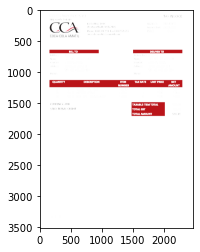

In [3]:
import cv2
img = plt.imread("Test Invoice 344649176.png")
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
# first parameter is basicaly  the original image,
# kernel is the matrix with which image is convolved 
# and third parameter is the number of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
plt.imshow(img)
plt.imshow(img_erosion)
plt.imshow(img_dilation)

True

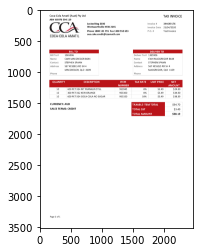

In [4]:

#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('Test Invoice 344649176.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('test_write.jpg',image)

# color inversion

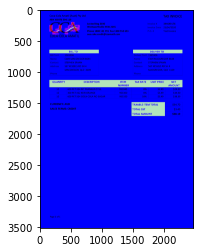

In [5]:
#import the required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
image = cv2.imread('Test Invoice 344649176.png') 
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

# Resize

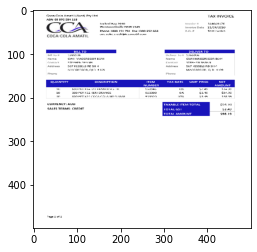

In [28]:
import cv2 
import interpolation
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image 
image = cv2.imread('Test Invoice 344649176.png') 
#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(500,500)) 
#plot the resized image
plt.imshow(smaller_image)

# Rotation

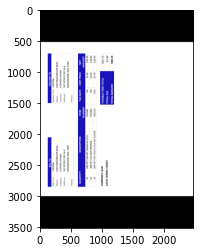

In [7]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('Test Invoice 344649176.png') 
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

# Image Translation

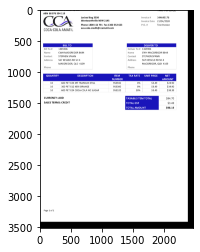

In [8]:

#importing the required libraries 
import numpy as np 
import  cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image
image = cv2.imread('Test Invoice 344649176.png')
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

# THE DIFFERENT THRESHOLDING STYLES

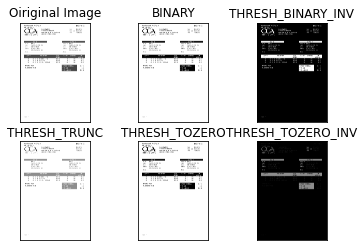

In [9]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('Test Invoice 344649176.png',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# THE DIFFERENT THRESHOLDING STYLES

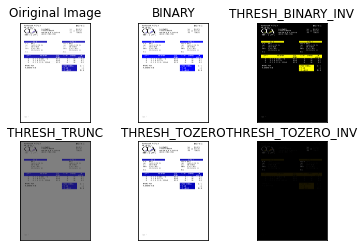

In [10]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('Test Invoice 344649176.png',1)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# Image Segmentation

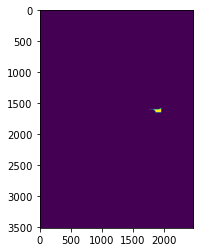

In [11]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading the image
image = cv2.imread('Test Invoice 344649176.png')
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

# Bitwise Operations

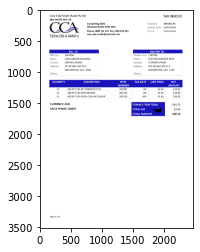

In [12]:
#import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
#read the image
image = cv2.imread('Test Invoice 344649176.png')
#apply thresholdin 
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
plt.imshow(final)

# Edge Detection

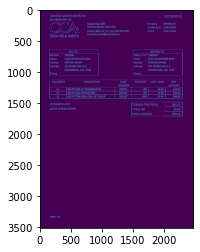

In [13]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('Test Invoice 344649176.png') 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

# Adaptive Thresholding

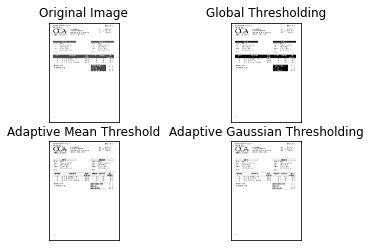

In [14]:

#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread('Test Invoice 344649176.png',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# Image Filtering

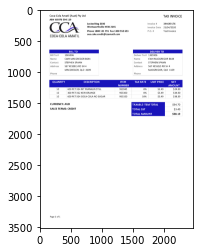

In [15]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('Test Invoice 344649176.png') 
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
plt.imshow(dst) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

# skimage

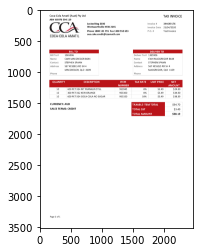

In [19]:
import skimage.io

# read input image
image = skimage.io.imread('Test Invoice 344649176.png')

# display original image
fig, ax = plt.subplots()
plt.imshow(image)

#  HAKKI EGEMEN GÜLPINAR

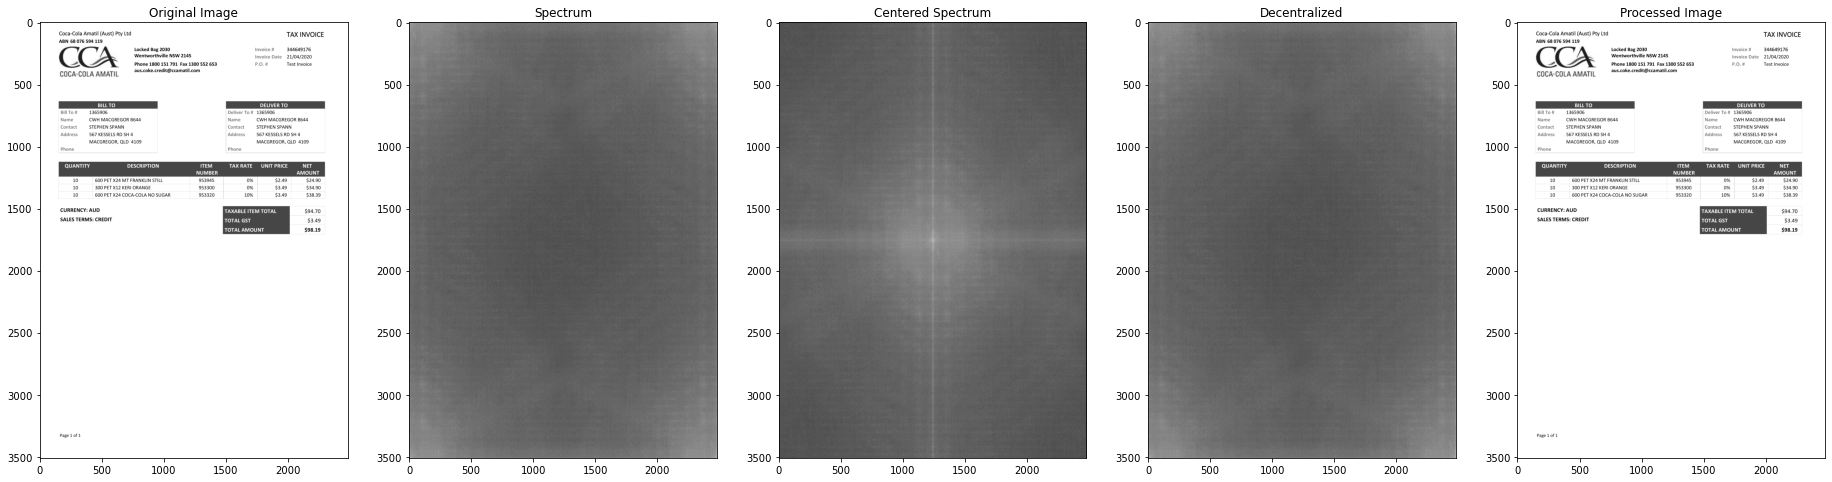

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
## HAKKI EGEMEN GÜLPINAR 17-155-014
original_image = cv2.imread("Test Invoice 344649176.png", 0)
spectrum = np.fft.fft2(original_image)
centered_spectrum = np.fft.fftshift(spectrum)
decentralized = np.fft.ifftshift(centered_spectrum)
processed_image = np.fft.ifft2(decentralized)

plt.subplot(151), plt.imshow(original_image, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(spectrum)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(centered_spectrum)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(decentralized)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(processed_image), "gray"), plt.title("Processed Image")

plt.show()


# Histogram

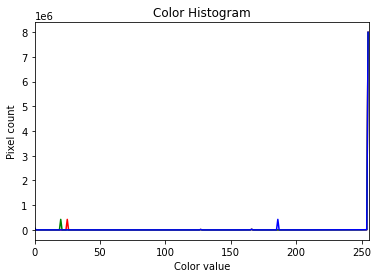

In [23]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

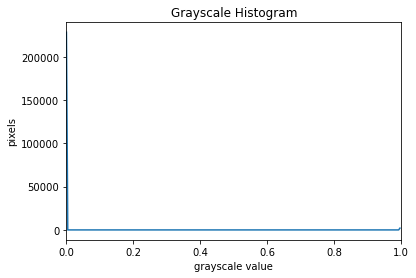

In [24]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(image, bins=256, range=(0.0, 1.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

# Power Law Transformation

In [25]:
import cv2
import numpy as np
 
im = cv2.imread('Test Invoice 344649176.png')
im = im/255.0
im_power_law_transformation = cv2.pow(im,3.6)
cv2.imshow('Original Image',im)
cv2.imshow('Power Law Transformation',im_power_law_transformation)
cv2.waitKey(0)

-1

# Arithmetic operations for Brightening and Darkening of images

In [ ]:
import cv2
import numpy as np
image=cv2.imread('Test Invoice 344649176.png')
#create a matrix of one's, then multiply it by a scaler of 100'
#np.ones gives a matrix with same dimension as of our image with all the values being 100 in this case
M = np.ones(image.shape, dtype="uint8") * 100
#we use this to add this matrix M to our image
#notice the increase in brightness
added=cv2.add(image,M)
cv2.imshow("Added",added)
cv2.waitKey(0)
#likewise we can also substract
#notice the decrease in brightness
subtracted=cv2.subtract(image,M)
cv2.imshow("subtracted",subtracted)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Pyramids( Another way of resizing)

In [26]:
import cv2
image=cv2.imread('Test Invoice 344649176.png')
smaller=cv2.pyrDown(image)
larger=cv2.pyrUp(smaller)
cv2.imshow('original',image)
cv2.waitKey(0)
cv2.imshow('smaller',smaller)
cv2.waitKey(0)
cv2.imshow('larger',larger)
cv2.waitKey(0)
# increasing the quality of converted larger image from smaller image using cubic interpolation
img_double=cv2.resize(smaller,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
cv2.imshow('scaing_cubicInterpolation',img_double)
cv2.waitKey(0)
cv2.destroyAllWindows()